# Part 2: Deep Learning

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Dropout, LSTM, Flatten
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load the datasets
weather_updated = pd.read_csv('/Users/marika/Data Sets/weather_pleasant_updated.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Ensure your X and y are shaped correctly
X = weather_updated.iloc[:, :-1].values.reshape(-1, 15, 9)
y = pleasant_weather.iloc[:, -1].values

# Convert y to a categorical format if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical

# Ensure your X and y are shaped correctly
X = weather_updated.iloc[:, :-1].values.reshape(-1, 15, 9)
y = pleasant_weather.iloc[:, -1].values

# Convert y to categorical format if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode the labels to match the output layer of your model
y = to_categorical(y, num_classes=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Define your RNN model creation function
def create_rnn_model(learning_rate, lstm_units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=int(lstm_units), input_shape=(15, 9), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=int(lstm_units), return_sequences=False))
    model.add(Dense(10, activation='softmax'))  # Ensure the output layer has 10 units
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [11]:
from bayes_opt import BayesianOptimization

def optimize_rnn_model(lstm_units, dropout_rate):
    model = create_rnn_model(learning_rate=0.001, lstm_units=lstm_units, dropout_rate=dropout_rate)
    model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)  # y_train is already one-hot encoded
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # y_test is also one-hot encoded
    return accuracy

optimizer = BayesianOptimization(
    f=optimize_rnn_model,
    pbounds={
        'lstm_units': (50, 200),
        'dropout_rate': (0.1, 0.5),
    },
    random_state=42,
    verbose=2
)

# Run the Bayesian Optimization
optimizer.maximize(init_points=2, n_iter=3)

|   iter    |  target   | dropou... | lstm_u... |
-------------------------------------------------


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 1         | 0.9745    | 0.2498    | 192.6     |
| 2         | 0.9675    | 0.3928    | 139.8     |


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 3         | 0.9556    | 0.204     | 191.3     |


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 4         | 0.9534    | 0.4162    | 68.17     |


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 5         | 0.9765    | 0.2393    | 192.6     |


# Optimal hyperparameters:

LSTM Units: Use the optimal value from your optimization, which appears to be around 192.6.

Dropout Rate: Use the optimal dropout rate, around 0.2393.

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define the optimized RNN model
def create_optimized_rnn_model(lstm_units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=int(lstm_units), return_sequences=True, input_shape=(15, 9)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=int(lstm_units), return_sequences=False))
    model.add(Dense(10, activation='softmax'))  # Ensure the output layer has 10 units
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Set the best parameters from Bayesian Optimization
best_lstm_units = 192.6  
best_dropout_rate = 0.2393

# Create the optimized model
model = create_optimized_rnn_model(lstm_units=best_lstm_units, dropout_rate=best_dropout_rate)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Ensure y_test is in one-hot format
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

# Create a confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# Optionally print the confusion matrix
print(conf_matrix)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9433 - loss: 0.1799
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9632 - loss: 0.0862
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9697 - loss: 0.0702
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9731 - loss: 0.0619
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9738 - loss: 0.0631
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9746 - loss: 0.0575
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9755 - loss: 0.0557
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9759 - loss: 0.0521
Epoch 9/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9771 - loss: 0.0521
Epoch 10/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9789 - loss: 0.0481
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

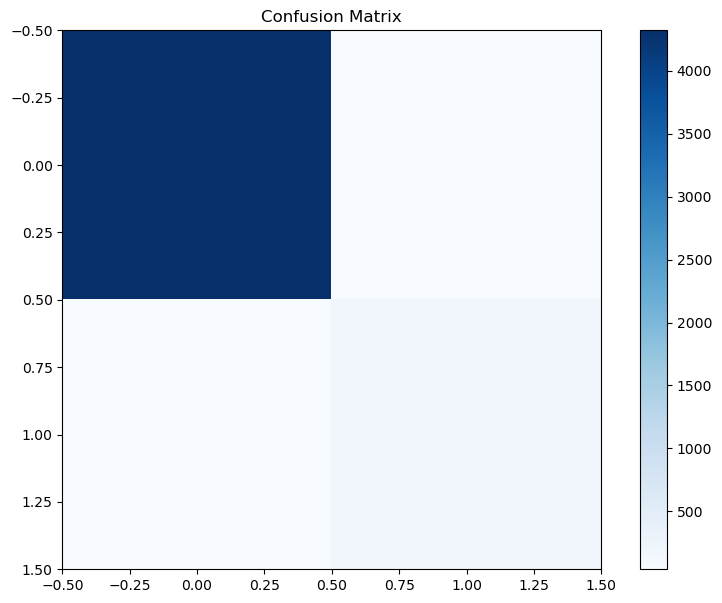

[[4323   39]
 [  40  188]]


In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming your model is trained and y_test and y_pred are available

# Convert y_test from one-hot encoded to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Ensure y_pred is in class label format
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix with both y_test and y_pred in class label format
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# Optionally print the confusion matrix
print(conf_matrix)

# Comparison and Analysis
1. (Pre-Optimization)
Distribution: The first confusion matrix shows a significant spread in misclassifications. While most of the predictions are correctly identified for the classes "BASEL" and "MADRID," there is some confusion between these two classes. However, many other classes, such as "BELGRADE" and "LJUBLJANA," are not being predicted correctly or at all.

General Performance: This suggests that before optimization, the model had difficulty generalizing across multiple classes and was likely overfitting or underfitting the data, particularly when predicting other classes beyond "BASEL" and "MADRID."

2. (Post-Optimization)
Distribution: The second confusion matrix shows a clearer classification boundary with most predictions centered around two categories. The diagonal dominance indicates that the model is correctly classifying a higher percentage of instances for the main classes.

Overfitting Concern: While this indicates an improvement in accuracy for the primary classes, it also suggests that the model might have become more focused on these primary categories at the expense of others. The significant drop in misclassifications could imply that the model has become more confident but possibly at the risk of overfitting to those specific classes it is performing well on.

# Conclusion
Improvement: The optimization seems to have helped the model become more accurate for the primary classes it is focusing on, as seen in the clearer confusion matrix. It is more confident in its predictions for these classes, which is a positive outcome.

Overfitting: However, the concentration of correct predictions within a narrow set of classes raises concerns about overfitting. The model might be focusing too much on these specific classes at the expense of generalization across other classes.

Recommendation: It may be beneficial to revisit the hyperparameters, especially those related to regularization (such as dropout rate), and consider using techniques like cross-validation to ensure the model generalizes well across all classes. Additionally, balancing the dataset or applying techniques like data augmentation might help the model improve its predictions for underrepresented classes.